In [1]:
# Import dependencies
# import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# Import dataset
store_df = pd.read_csv('Resources/store_data.csv')
store_df.head()

,id,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,brand_name,SRP,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,media_type
0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,"Daily Paper, Radio"
1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,"Daily Paper, Radio"
2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,"Daily Paper, Radio"
3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,In-Store Coupon
4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,Golden,1.36,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,Radio


In [3]:
# Check data frame shape
shape = store_df.shape
print(f"Store dataset including {shape[0]} rows and {shape[1]} cloumns.")

Store dataset including 38892 rows and 29 cloumns.


In [4]:
# Check data frame columns
store_df.columns

Index(['id', 'food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost',
       'media_type'],
      dtype='object')

In [5]:
# Check datatypes
store_df.dtypes

id                            int64
food_category                object
food_department              object
food_family                  object
store_sales(in millions)    float64
store_cost(in millions)     float64
unit_sales(in millions)     float64
promotion_name               object
brand_name                   object
SRP                         float64
gross_weight                float64
net_weight                  float64
recyclable_package          float64
low_fat                     float64
units_per_case              float64
store_type                   object
store_city                   object
store_state                  object
store_sqft                  float64
grocery_sqft                float64
frozen_sqft                 float64
meat_sqft                   float64
coffee_bar                  float64
video_store                 float64
salad_bar                   float64
prepared_food               float64
florist                     float64
cost                        

In [6]:
# Check null values for each column
store_df.isnull().sum()

id                          0
food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_store                 0
salad_bar                   0
prepared_food               0
florist                     0
cost                        0
media_type                  0
dtype: int64

In [7]:
# Generate categorical variable list
cat = store_df.dtypes[store_df.dtypes == 'object'].index.tolist()
cat

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [8]:
# Count the number of categorical variables.
print(f"There are {len(cat)} categorical variables in store data frame.")

There are 9 categorical variables in store data frame.


In [9]:
# Generate a numerical variable list
num = store_df.dtypes[(store_df.dtypes == 'int64') | (store_df.dtypes == 'float64')].index.tolist()
num

['id',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [10]:
# Count the number of numerical variables.
print(f"There are {len(num)} numerical variables in store data frame.")

There are 20 numerical variables in store data frame.


## Multiple Linear Regression

In [11]:
# Create a new data frame which contains store related numercial variables only.
store_num = store_df[['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'store_sqft','grocery_sqft','frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist','cost']]
store_num

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60421,0.99,0.4554,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19
60422,1.21,0.4477,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45
60423,2.76,1.3248,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25
60424,1.60,0.4960,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42


In [12]:
# Statistic details of the store_mlr data frame
store_num.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000
mean,6.515973,2.606900,3.080556,27199.413427,18241.415895,5374.951070,3583.187314,0.562532,0.247583,0.482979,0.482979,0.496066,98.402350
std,3.460749,1.447546,0.832546,5957.915401,3739.762002,1733.637554,1155.559700,0.496081,0.431614,0.499717,0.499717,0.499991,30.434059
min,0.510000,0.170500,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.780000,1.486800,3.000000,21215.000000,15321.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.470000
50%,5.910000,2.371550,3.000000,27694.000000,18670.000000,5011.000000,3340.000000,1.000000,0.000000,0.000000,0.000000,0.000000,98.520000
75%,8.650000,3.475275,4.000000,30268.000000,22123.000000,5633.000000,3755.000000,1.000000,0.000000,1.000000,1.000000,1.000000,126.620000
max,19.900000,9.726500,6.000000,39696.000000,24390.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [13]:
# Count unique values for each numerical variable column
store_df[cat].nunique()

food_category       45
food_department     22
food_family          3
promotion_name      49
brand_name         111
store_type           4
store_city          10
store_state          3
media_type          13
dtype: int64

In [14]:
# Create a new data frame which contains store related categorcial variables only.
store_cat = store_df[['promotion_name','store_type','store_city','store_state','media_type']]
store_cat.head()

,promotion_name,store_type,store_city,store_state,media_type
0,Bag Stuffers,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Cash Register Lottery,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,High Roller Savings,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
3,Cash Register Lottery,Deluxe Supermarket,Salem,OR,In-Store Coupon
4,Double Down Sale,Deluxe Supermarket,Salem,OR,Radio


In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(store_cat))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(store_cat.columns)
encode_df.head()

,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
encode_df.columns

Index(['promotion_name_Bag Stuffers', 'promotion_name_Best Savings',
       'promotion_name_Big Promo', 'promotion_name_Big Time Discounts',
       'promotion_name_Big Time Savings', 'promotion_name_Bye Bye Baby',
       'promotion_name_Cash Register Lottery',
       'promotion_name_Coupon Spectacular', 'promotion_name_Dimes Off',
       'promotion_name_Dollar Cutters', 'promotion_name_Dollar Days',
       'promotion_name_Double Down Sale', 'promotion_name_Double Your Savings',
       'promotion_name_Fantastic Discounts', 'promotion_name_Free For All',
       'promotion_name_Go For It', 'promotion_name_Green Light Days',
       'promotion_name_Green Light Special',
       'promotion_name_High Roller Savings',
       'promotion_name_I Cant Believe It Sale', 'promotion_name_Money Savers',
       'promotion_name_Mystery Sale', 'promotion_name_One Day Sale',
       'promotion_name_Pick Your Savings', 'promotion_name_Price Cutters',
       'promotion_name_Price Destroyers', 'promotion_name_

In [17]:
# Merge one-hot encoded features and drop the originals
combo_df = store_num.merge(encode_df, left_index=True, right_index=True)
combo_df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# # Change columns using column transformer
# X_df = combo_df.drop(columns='cost')

# col_trans = make_column_transformer(
#     (OneHotEncoder(handle_unknown='igonre'), store_cat.columns),
#     remainder='passthrough')
# X_df = col_trans.fit_transform(X_df)

In [19]:
# Split preprocessed data into our features and target arrays
y = combo_df['cost'].values
X = combo_df.drop(columns='cost').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")

X_train: (18889, 91);
X_test: (6297, 91);
y_train: (18889,);
y_test: (6297,);


In [21]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred

array([ 86.20062505, 102.32815772,  85.10351051, ...,  96.408691  ,
       107.52392191,  80.00090812])

In [23]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")

Accuracy of multiple linear regression is 4.11.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

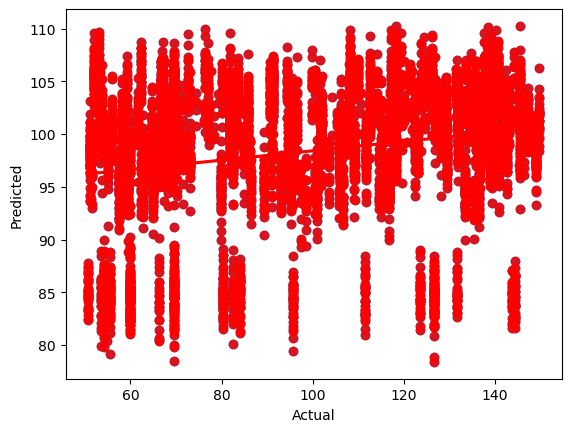

In [24]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

## Store sales as target

In [25]:
# Split preprocessed data into our features and target arrays
y = combo_df['store_sales(in millions)'].values
X = combo_df.drop(columns='store_sales(in millions)').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.